In [1]:
import timeit
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

import io

dataset = pd.read_csv('/content/drive/MyDrive/creditcard_1.csv')

Mounted at /content/drive


In [3]:
print(dataset.shape)

(2001, 31)


In [4]:
#split dataset in features and target variable
X = dataset.drop('Class', axis=1) # Features
y = dataset['Class'] # Target variable

In [5]:
# Split dataset into training set and test set
train_x, test_x, train_Y, test_Y = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
# Check the shape of all of these
print("X_train shape is : ", train_x.shape)
print("X_test shape  is : ", test_x.shape)
print("y_train shape is : ", train_Y.shape)
print("y_test shape is  : ", test_Y.shape)

X_train shape is :  (1400, 30)
X_test shape  is :  (601, 30)
y_train shape is :  (1400,)
y_test shape is  :  (601,)


In [7]:
#Import svm model
from sklearn import svm

In [8]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear',probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(train_x, train_Y)

SVC(kernel='linear', probability=True)

In [9]:
#Predict the response for test dataset
y_pred = clf.predict(test_x)

In [10]:
confusion_matrix = metrics.confusion_matrix(test_Y, y_pred)
confusion_matrix

array([[443,   4],
       [ 14, 140]])

Text(0.5, 257.44, 'Predicted label')

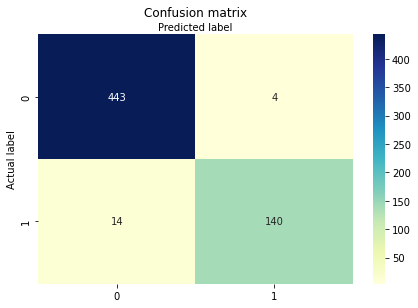

In [11]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [12]:
print(classification_report(test_Y,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       447
           1       0.97      0.91      0.94       154

    accuracy                           0.97       601
   macro avg       0.97      0.95      0.96       601
weighted avg       0.97      0.97      0.97       601



In [13]:
print("Accuracy:",metrics.accuracy_score(test_Y, y_pred))
print("Precision:",metrics.precision_score(test_Y, y_pred))
print("Recall:",metrics.recall_score(test_Y, y_pred))
print("F1_Score:",metrics.f1_score(test_Y, y_pred))
print("ROC_AUC Score:",roc_auc_score(test_Y, clf.predict_proba(test_x)[:, 1]))

Accuracy: 0.9700499168053245
Precision: 0.9722222222222222
Recall: 0.9090909090909091
F1_Score: 0.9395973154362416
ROC_AUC Score: 0.9859525262209826


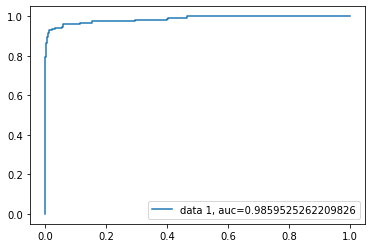

In [14]:
y_pred_proba = clf.predict_proba(test_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_Y,  y_pred_proba)
auc = metrics.roc_auc_score(test_Y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [15]:
#Create a svm Classifier
clf1 = svm.SVC(kernel='rbf',probability=True) # rbf Kernel

#Train the model using the training sets
clf1.fit(train_x, train_Y)

SVC(probability=True)

In [16]:
y_pred1 = clf1.predict(test_x)

In [17]:
confusion_matrix1 = metrics.confusion_matrix(test_Y, y_pred1)
confusion_matrix1

array([[443,   4],
       [150,   4]])

Text(0.5, 257.44, 'Predicted label')

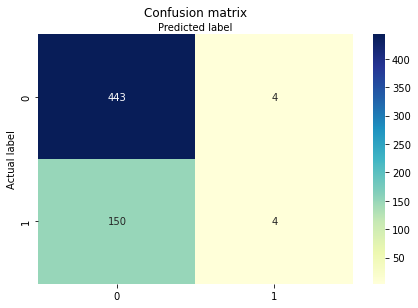

In [19]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [20]:
print(classification_report(test_Y,y_pred1))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85       447
           1       0.50      0.03      0.05       154

    accuracy                           0.74       601
   macro avg       0.62      0.51      0.45       601
weighted avg       0.68      0.74      0.65       601



In [21]:
print("Accuracy:",metrics.accuracy_score(test_Y, y_pred1))
print("Precision:",metrics.precision_score(test_Y, y_pred1))
print("Recall:",metrics.recall_score(test_Y, y_pred1))
print("F1_Score:",metrics.f1_score(test_Y, y_pred1))
print("ROC_AUC Score:",roc_auc_score(test_Y, clf1.predict_proba(test_x)[:, 1]))

Accuracy: 0.7437603993344426
Precision: 0.5
Recall: 0.025974025974025976
F1_Score: 0.04938271604938272
ROC_AUC Score: 0.9525407478427613


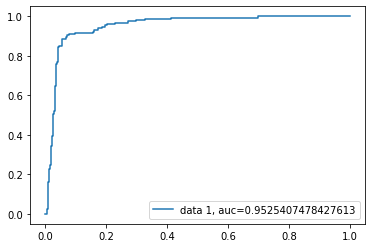

In [22]:
y_pred_proba = clf1.predict_proba(test_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_Y,  y_pred_proba)
auc = metrics.roc_auc_score(test_Y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()